# ライブラリ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.cluster import KMeans
import seaborn as sns

# データ読み込み

In [2]:
df = pd.read_csv('../processing_data/merged.csv', encoding='shift_jis')

In [3]:
def calculate_and_plot_clusters(df, frequency='week', n_clusters=3):
    # 1. 店舗ID別に同じ日の売上を合計する
    df_grouped = df.groupby(['店舗ID', '日付']).agg({'売上': 'sum'}).reset_index()

    # 2. 新しいDataFrame df_new を作成する
    df_new = df_grouped.rename(columns={'売上': '日売上'})

    # 3. 週または月ごとの売り上げ増加率を計算する
    df_new['日付'] = pd.to_datetime(df_new['日付'])
    if frequency == 'week':
        df_new['期間'] = df_new['日付'].dt.to_period('W')
        time_column = '前週の日売上'
    elif frequency == 'month':
        df_new['期間'] = df_new['日付'].dt.to_period('M')
        time_column = '前月の日売上'
    else:
        raise ValueError("Invalid value for 'frequency'. Use 'week' or 'month'.")

    df_new[time_column] = df_new.groupby('店舗ID')['日売上'].shift(1)
    df_new['売上増加率'] = (df_new['日売上'] - df_new[time_column]) / df_new[time_column]

    # 4. 店舗IDをクラスタリングする
    cluster_df = df_new.groupby('店舗ID')['売上増加率'].mean().reset_index()

    # クラスタリング手法を選択し、実行する（例: K-meansクラスタリング）
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_df['クラスタ'] = kmeans.fit_predict(cluster_df[['売上増加率']])

    # グラフのスタイルを設定（お好みで変更可能）
    sns.set(style="whitegrid")

    # 散布図を描画
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=cluster_df, x='店舗ID', y='売上増加率', hue='クラスタ', palette='Set1', s=100)

    # グラフにタイトルや軸ラベルを追加（お好みで変更可能）
    plt.title(f'clusterling_by_({frequency})')
    plt.xlabel('storeID')
    plt.ylabel('sales_increase_rate')

    # 凡例を表示
    plt.legend(title='cluster', loc='upper right')
    
    # x軸のメモリを1から17まで表示
    plt.xticks(range(0, 18))

    # グラフを表示
    plt.show()

- 週ごとのクラスタリング

c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


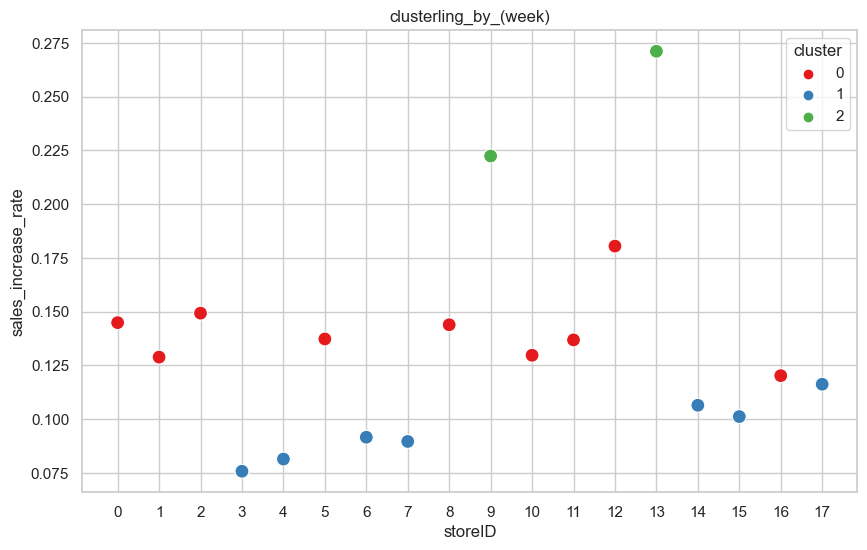

In [4]:
# 週ごとのクラスタリング
calculate_and_plot_clusters(df, frequency='week', n_clusters=3)

- 月ごとのクラスタリング

c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


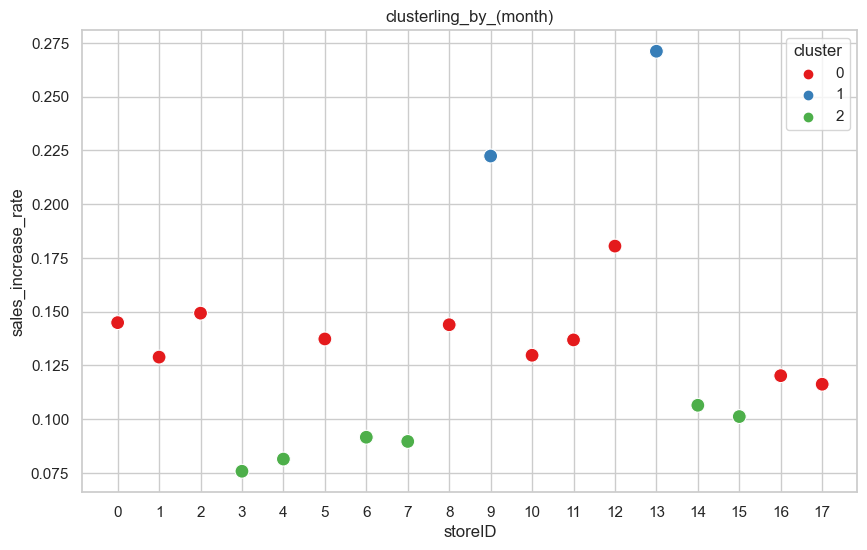

In [5]:
calculate_and_plot_clusters(df, frequency='month', n_clusters=3)

- 商品カテゴリ別に表示

In [6]:
def calculate_and_plot_clusters_by_sales(df, frequency='week', n_clusters=3):
    # 1. 商品カテゴリ別に同じ日の売上を合計する
    df_grouped = df.groupby(['商品カテゴリ', '日付']).agg({'売上': 'sum'}).reset_index()

    # 2. 新しいDataFrame df_new を作成する
    df_new = df_grouped.rename(columns={'売上': '日売上'})

    # 3. 週または月ごとの売り上げ増加率を計算する
    df_new['日付'] = pd.to_datetime(df_new['日付'])
    if frequency == 'week':
        df_new['期間'] = df_new['日付'].dt.to_period('W')
        time_column = '前週の日売上'
    elif frequency == 'month':
        df_new['期間'] = df_new['日付'].dt.to_period('M')
        time_column = '前月の日売上'
    else:
        raise ValueError("Invalid value for 'frequency'. Use 'week' or 'month'.")

    df_new[time_column] = df_new.groupby('商品カテゴリ')['日売上'].shift(1)
    df_new['売上増加率'] = (df_new['日売上'] - df_new[time_column]) / df_new[time_column]

    # 4. 商品カテゴリをクラスタリングする
    cluster_df = df_new.groupby('商品カテゴリ')['売上増加率'].mean().reset_index()

    # クラスタリング手法を選択し、実行する（例: K-meansクラスタリング）
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_df['クラスタ'] = kmeans.fit_predict(cluster_df[['売上増加率']])

    # グラフのスタイルを設定（お好みで変更可能）
    sns.set(style="whitegrid")

    # 散布図を描画
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=cluster_df, x='商品カテゴリ', y='売上増加率', hue='クラスタ', palette='Set1', s=100)

    # グラフにタイトルや軸ラベルを追加（お好みで変更可能）
    plt.title(f'clusterling_by_({frequency})')
    plt.xlabel('商品カテゴリ')
    plt.ylabel('売上増加率')

    # 凡例を表示
    plt.legend(title='クラスタ', loc='upper right')

    # グラフを表示
    plt.show()

- 週別

c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12466 (\N{KATAKANA LETTER GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\p

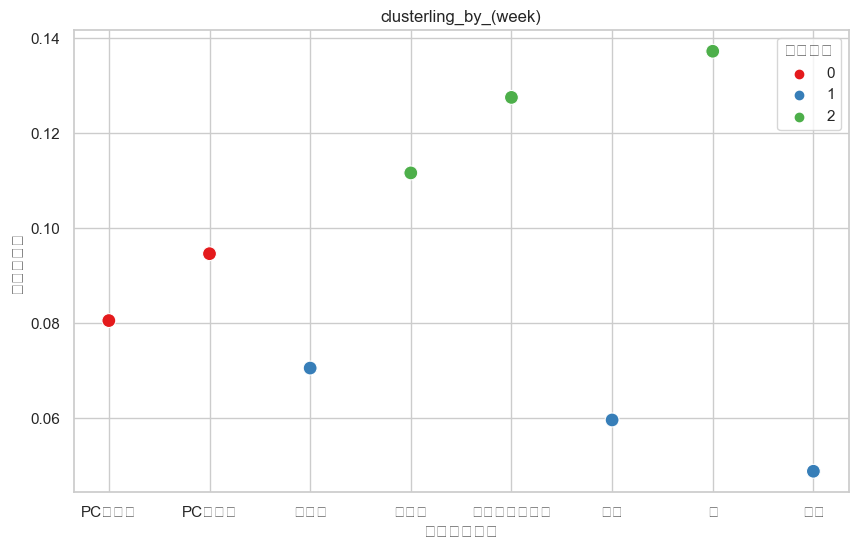

In [7]:
calculate_and_plot_clusters_by_sales(df=df, frequency='week', n_clusters=3)